## Logistic Regression 

#### Scenario : Build classification models on the Mobile Price Classification dataset to predict the price range of a mobile phone given its specification features.

#### Step 1 : Data gathering

In [188]:
from warnings import filterwarnings
filterwarnings('ignore')

In [189]:
import pandas as pd
path = r"E:\data science\datasets\ML\Mobile price classification assignment\train.csv"
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Step 2 :Basic data quality check

#### Data exploration

In [190]:
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(2000, 21)


In [191]:
print("Columns of the dataset:")
print(df.columns)

Columns of the dataset:
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [192]:
print("Describe of the dataset:")
print(df.describe())

Describe of the dataset:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837 

In [193]:
print("Info of the dataset:")
print(df.info())

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   

In [194]:
# Checking for missing values:
print("Missing values:")
print(df.isnull().sum())

Missing values:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


#### There is no any missing values in dataset.

In [195]:
# Checking duplicates:
print("Duplicates of the dataset:")
print(df.duplicated().sum())

Duplicates of the dataset:
0


#### There is no any duplicates present in dataset even for further work we drop duplicate.

In [196]:
df = df.drop_duplicates()

In [197]:
# For further procedure we will copy the original dataset and keep it is original dataset as it is.
#df1 = df.copy()

### Step 3 : Seperte X and Y features:
    Y : Target feature : price_range
    X : All remaining features

In [198]:
X = df.drop(columns=['price_range'])
Y = df[['price_range']]

In [199]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [200]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


### STep 4: Data processing and Data cleaning

In [201]:
# Import required libraries for this process:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [202]:
pre = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [203]:
pre

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [204]:
X_pre = pre.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


### Step 5 : Train_Test_split

In [205]:
# Import libraries
from sklearn.model_selection import train_test_split

In [206]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.7,test_size=0.3,random_state=21)

In [207]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1200,-1.612805,-0.990050,1.075937,-1.019184,-0.762495,-1.043966,-0.002563,-0.699686,-1.476344,0.646842,1.663176,-1.345839,-0.554317,-1.074463,1.114266,0.283103,-0.917331,-1.786861,0.994018,-1.014099
622,-0.030772,-0.990050,-1.007906,0.981177,-0.992890,0.957886,-1.656260,0.340740,-0.063548,1.084046,-1.470690,-0.964925,-0.348342,0.507890,-0.072765,1.201522,0.730240,0.559641,0.994018,-1.014099
658,1.564918,1.010051,-0.517590,-1.019184,2.002254,0.957886,0.989655,-1.046495,1.094945,0.646842,1.168355,-0.617820,-0.582089,1.553571,1.114266,1.431127,1.096367,0.559641,0.994018,-1.014099
1990,0.861540,1.010051,1.075937,-1.019184,0.850275,0.957886,0.217930,1.034357,-1.561112,-1.539175,-0.151168,0.220642,0.403814,-1.685827,-1.734608,-0.635317,-0.734267,0.559641,-1.006018,-1.014099
310,0.399450,1.010051,-0.027274,0.981177,0.159088,-1.043966,0.658915,-0.006069,1.123201,-1.101971,-0.645989,-1.354854,-0.308998,1.259416,0.876859,1.431127,0.364113,-1.786861,0.994018,-1.014099


In [208]:
ytrain.head()

,price_range
1200,0
622,2
658,3
1990,0
310,3


In [209]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
541,-1.014136,-0.990050,-0.395011,0.981177,-0.762495,0.957886,0.328176,0.340740,1.010178,-0.227564,-0.481048,1.309289,1.304086,0.935753,-1.497202,-1.094526,0.181050,0.559641,0.994018,0.986097
1211,-1.196241,1.010051,0.095305,-1.019184,0.619880,0.957886,-1.656260,-0.352878,1.151457,1.521249,-0.151168,1.275480,0.292726,-1.511547,-0.547577,0.053498,-1.283457,0.559641,0.994018,0.986097
1862,-0.445060,-0.990050,1.443675,-1.019184,-0.301703,-1.043966,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,0.559641,-1.006018,-1.014099
1094,-1.253148,1.010051,-0.027274,-1.019184,-0.992890,-1.043966,-1.656260,1.727974,-1.448088,-0.664768,-1.305750,-0.843213,-0.885265,-1.598226,-1.734608,-0.864922,-0.551204,0.559641,0.994018,0.986097
465,0.784145,1.010051,0.095305,-1.019184,0.159088,0.957886,0.548669,1.034357,-0.628666,-0.664768,0.013773,-0.834197,-0.901466,1.408799,0.402047,0.971917,-0.368140,0.559641,-1.006018,-1.014099


In [210]:
ytest.head()

,price_range
541,3
1211,0
1862,0
1094,0
465,3


In [211]:
xtrain.index

Index([1200,  622,  658, 1990,  310,  884,  937, 1390,  668, 1232,
       ...
        610,  700, 1443, 1144,  368,   48,  772, 1848, 1231,  969],
      dtype='int64', length=1400)

### Step 6.1 : Build the model for logistic regression

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [214]:
model.classes_

array([0, 1, 2, 3])

In [215]:
ypred_train = model.predict(xtrain)

In [216]:
yprob_train = model.predict_proba(xtrain)

In [217]:
yprob_train[0]

array([9.98488713e-01, 1.51125965e-03, 2.69711636e-08, 6.86065896e-16])

In [218]:
model.classes_

array([0, 1, 2, 3])

In [219]:
ypred_train[:5]

array([0, 2, 3, 0, 3])

In [220]:
ytrain.head()

,price_range
1200,0
622,2
658,3
1990,0
310,3


### Step 6.2 : Build model for Decision Tree classifier

In [241]:
from sklearn.tree import DecisionTreeClassifier


In [244]:
dtc = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=3,
    criterion='gini'
)

In [245]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3)

### Step 6.3 : Build model for Random Forest Classifier

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
rfc = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=5)

### Step 7: Model evalution

In [221]:
model.score(xtrain,ytrain)

0.9728571428571429

In [222]:
model.score(xtest,ytest)

0.9583333333333334

In [256]:
dtc.score(xtrain,ytrain)

0.8828571428571429

In [257]:
dtc.score(xtest,ytest)

0.815

In [258]:
rfc.score(xtrain,ytrain)

0.8014285714285714

In [259]:
rfc.score(xtest,ytest)

0.775

### Step 8: Hyperparameter tunning

#### 8.1 : Hyperparameter tunning for decision tree classifier

In [260]:
from sklearn.model_selection import GridSearchCV

In [265]:
params_grid = {
     'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,5,6],
    'min_samples_split':[2,5,6,9],
    'criterion':['gini','entropy']
}

In [266]:
base_dtc_model = DecisionTreeClassifier()

In [267]:
gscv = GridSearchCV(estimator=base_dtc_model,param_grid=params_grid,cv=4,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 5, 6],
                         'min_samples_split': [2, 5, 6, 9]},
             scoring='f1_macro')

In [268]:
gscv.best_score_

np.float64(0.8375053991387318)

In [269]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [270]:
gscv.score(xtrain,ytrain)

0.9857356660217143

In [271]:
gscv.score(xtest,ytest)

0.8585286569202991

In [272]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=8)

#### 8.2 : Hyperparameter tunning for Random Forest

In [273]:
from sklearn.model_selection import RandomizedSearchCV

In [275]:
params_random = {
    'n_estimators' : [5,10,35,50,75,100,150],
    'max_depth': [3,4,5,7,9,11],
    'min_samples_leaf': [2,4,5,8,72],
    'min_samples_split': [2,3,4,5,6],
}

In [277]:
base_rsv_model = RandomForestClassifier()

In [278]:
rscv = RandomizedSearchCV(estimator=base_rsv_model,param_distributions=params_random,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 4, 5, 7, 9, 11],
                                        'min_samples_leaf': [2, 4, 5, 8, 72],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [5, 10, 35, 50, 75, 100,
                                                         150]},
                   scoring='f1_macro')

In [279]:
rscv.best_params_

{'n_estimators': 75,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 11}

In [280]:
rscv.best_score_

np.float64(0.8620825557375156)

In [283]:
rscv.score(xtrain,ytrain)

1.0

In [284]:
rscv.score(xtest,ytest)

0.8731611075033205

In [281]:
best_rfc = rscv.best_estimator_

In [282]:
best_rfc

RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=75)

In [285]:
best_rfc.score(xtrain,ytrain)

1.0

In [286]:
best_rfc.score(xtest,ytest)

0.8733333333333333

### Step 8 : Confusion matrix

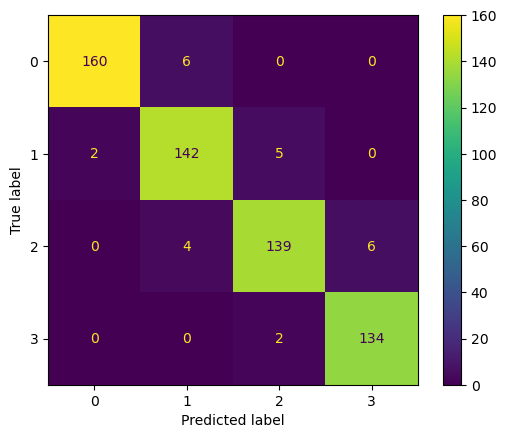

In [223]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)


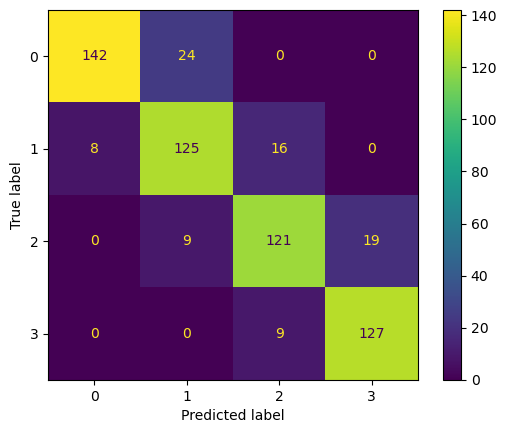

In [287]:
ConfusionMatrixDisplay.from_estimator(best_dtc,xtest,ytest)

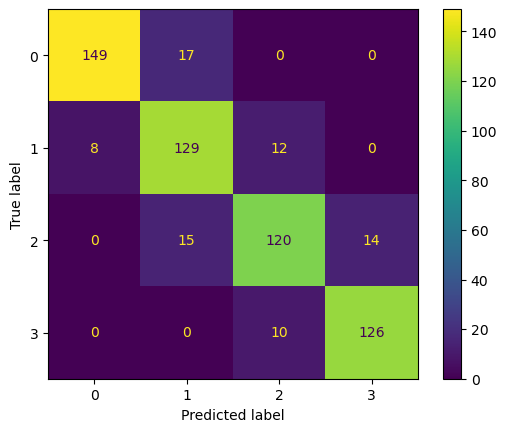

In [288]:
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

### Step 9: Classification report

In [224]:
ypred_test = model.predict(xtest)

In [225]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       166
           1       0.93      0.95      0.94       149
           2       0.95      0.93      0.94       149
           3       0.96      0.99      0.97       136

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [226]:
from sklearn.metrics import f1_score
f1_score(ytest,ypred_test,average='macro')

0.9581296812228755

### From above coming values all scores are greater than 80%(0.80) so we can consider for final model building.

In [227]:
path2 = r"E:\data science\datasets\ML\Mobile price classification assignment\test(out of sample data).csv"
xnew = pd.read_csv(path2)
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [228]:
xnew = xnew.drop('id', axis=1)

In [229]:
xnew.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [230]:
xnew.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

### Preprocess and clean your out of sample data

In [231]:
xnew_pre = pre.transform(xnew)
xnew_pre = pd.DataFrame(xnew_pre, columns=xnew.columns)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [232]:
pre

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [233]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


### Step 10 : Final predictions

In [234]:
price_predicted = model.predict(xnew_pre)

In [240]:
price_predicted

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [236]:
xnew

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [237]:
xnew['price_range_predicted'] = price_predicted

In [238]:
xnew

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range_predicted
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
